# Artificial Neural Networks AM41AN

## Week 1 Linear Perceptron

## Task 1 a
Construct your own artificial dataset. The data to be consider has the following form:
$$
t_n=w_1 x_n + w_0 +\varepsilon_n,
$$
where $x_n$ is the independent variable or input, $t_n$ is the dependent variable, target or label, $\varepsilon$ represents the added noise to the model (that has been drawn from a Normal Distribution with zero mean and $\sigma^2$ variance) and $w_1$ and $w_0$ are constants.

Construct a data set formed by $N=100$ ordered pairs $(x_n,t_n)$, where $x_n$ is drawn from a uniform distribution between 0 and 4 for all $n=0,1,\dots,100$, $w_1=3$, $w_0=1$  and $\varepsilon\sim\mathcal{N}(\varepsilon|0,0.04)$, i.e. a Gaussian deviate with zero mean and 0.04 variance.

Hint: Use the library NumPy https://numpy.org/

## Task 1 b

Make a plot y vs x of the data set

Hint: Use the library PyPlot https://matplotlib.org/


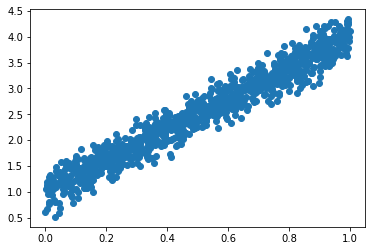

In [5]:
################
### Task 1 a ###
################

import numpy as np                        # Imports NumPy
def data(eps,w1,w0,L):                    # Function data(eps) constructs a data set with the adition of a Gaussian noise with std eps and parameters w0 and w1
    ee = np.random.normal(0, eps, L)      # Noise array
    x  = np.random.uniform(0,1,L)         # Independent variable array
    t  = w0 + w1 * x + ee                 # Dependent variable t = w0 + w1 x + Gaussian noise array
    return(x,t)                           # The function returns two arrays of dim L. Independent and dependent variables respectively

x1 , t1 = data(0.2,3,1,1000)              

################
### Task 1 b ###
################

import matplotlib.pyplot as plt           # Imports PyPlot          
plt.scatter(x1,t1)                        # Simplest possible scatter points plot t vs x (Feel free to improve this plot)
plt.show()                                # Show


## Task 2
Compute the Gram matrix $\boldsymbol{\mathsf{M}}=\frac1L\sum_{j=1}^{N}|y_j\rangle\langle y_j|$, where $\langle y|=(1,x)$.

In [6]:
##############
### Task 2 ###
##############

def gram(xd,td):                 # Function gram(xd) that computes the correspondent learning rate for the dataset xd
    X1 = 0                       # First moment equated to zero
    X2 = 0                       # Second moment equated to zero
    T1 = 0                       # first component of b
    T2 = 0                       # second component of b
    ll = len(xd)
    for i in range(ll):          # Loop in the length of the dataset
        z  = xd[i]
        t  = td[i]
        X1 = X1 + z              # Calculation of the first moment
        X2 = X2 + z * z          # Calculation of the second moment
        T1 = T1 + t              # Calculation of the first component of b
        T2 = T2 + t * z          # Calculation of the second component of b
    X1 = X1 / ll                 # Normalization
    X2 = X2 / ll                 # Normalization
    T1 = T1 / ll                 # Normalization
    T2 = T2 / ll                 # Normalization
    G  = [[1 , X1] , [X1 , X2]]  # Gram matrix
    b  = [T1 , T2]               # Vector b
    return(b,G)                  # Returns the vector and the Gram matrix.
bg , Gg = gram(x1,t1)

## Task 3
Implement the leraning algorithm using the following equations for the updates of the parameters:
$$
\frac{\partial E}{\partial w_0}=-2(t_\ell-w_0-w_1x_\ell)\\
\frac{\partial E}{\partial w_1}=-2(t_\ell-w_0-w_1x_\ell)x_\ell.
$$
Compare the results obtained with the formula used to construct the dataset.

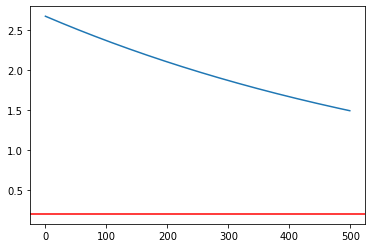

w0= 0.9247775775800973 w1= 0.5802476745963339 std= 1.489226016367262 eta= 0.001


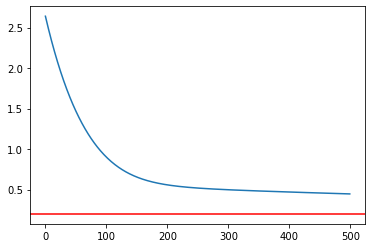

w0= 1.742204601781203 w1= 1.6199128822705355 std= 0.44687761304290874 eta= 0.01


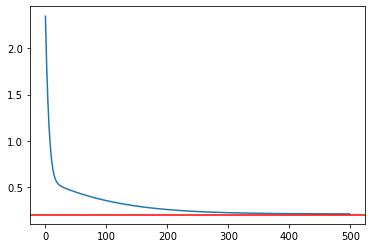

w0= 1.0401790673152882 w1= 2.91865566790163 std= 0.20879137235185954 eta= 0.1


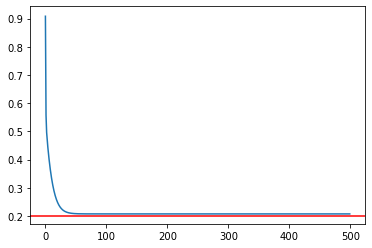

w0= 0.9989009788767476 w1= 2.994559515826059 std= 0.20764208524848302 eta= 1


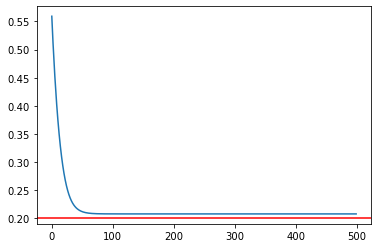

w0= 0.9989009788861198 w1= 2.9945595158088247 std= 0.20764208524848304 eta= 0.7732197044977251


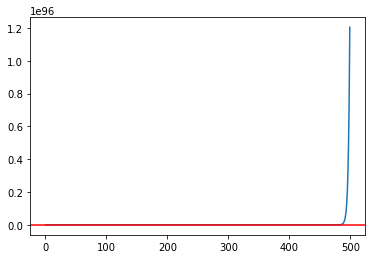

w0= -9.360311441778406e+95 w1= -5.090331703482219e+95 std= 1.2039476424811508e+96 eta= 2


In [7]:
##############
### Task 3 ###
##############
def la(Max,eta,G,b,xd,td,sigma):        # Function la(Max,eta,G,b,xd,td,sigma) that estimates the parameters for a linear regression. 
                                        # Max is the number of iterations, eta es the learning rate (if a negative number is input
                                        # the optimal value is computed and used) G is the Gram matrix, b is the vector, xd and td are
                                        # the data points coordinates and sigma is the std of the noise
    if eta < 0:                         # If eta is negative the optimal learning rate is computd and used
        ev, vv = np.linalg.eig(G)     
        eta = 1 / ev[0] - 0.01
    v0 = 0                              # Initial value for the vector of parameters      
    v1 = 0                           
    er = []                                                               # Error curve
    ll = len(xd)                                                          # Size of the dataset
    for i in range(Max):                                                  # Loop in iterations of the algorithm
        b0 = (1 - eta * G[0][0]) * v0 - eta * G[0][1] * v1 + eta * b[0]   # Updates for the parameter estimates
        b1 = (1 - eta * G[1][1]) * v1 - eta * G[0][1] * v0 + eta * b[1]
        v0 = b0
        v1 = b1
        ee = 0
        for j in range (ll):                                              # Computation of the quadratic error for the current parameters
            z = xd[j]
            y = td[j]
            ee = ee + (y - v0 - v1 * z) ** 2
        er.append(np.sqrt(ee / ll))                                       # The error is appended to the error curve
    fig, ax = plt.subplots()                                              # Plot of the error
    ax.plot(range(Max),er)
    ax.axhline(y = sigma, color = 'r')                                    # A horizontal line is plot to indicate the minimum achievable error
    plt.show()
    print('w0=',v0,'w1=',v1,'std=',np.sqrt(ee / ll),'eta=',eta)          # Final output
    
la(500,.001,Gg,bg,x1,t1,0.2)
la(500,.01,Gg,bg,x1,t1,0.2)
la(500,.1,Gg,bg,x1,t1,0.2)
la(500,1,Gg,bg,x1,t1,0.2)
la(500,-1,Gg,bg,x1,t1,0.2)
la(500,2,Gg,bg,x1,t1,0.2)
